In [1]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from re import findall as find
from tqdm import tqdm

In [2]:
#All the folders for the data

folder1="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\"
folder2="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\24112021\\"
folder3="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\15112021\\"
#File ids for early embryos
earlyfiles=['15112021_Pos002','15112021_Pos004','15112021_Pos006','15112021_Pos008',
            '15112021_Pos010','15112021_Pos012','15112021_Pos014','15112021_Pos016',
            '15112021_Pos018','26112021_Pos010', '26112021_Pos012', '26112021_Pos014',
            '26112021_Pos016', '26112021_Pos018', 
            '26112021_Pos022', '26112021_Pos024', '26112021_Pos026']

In [3]:
def IntensityDatasorting(folders=[folder1,folder2,folder3],earlyfiles=earlyfiles):
    # Initialize variables
    lendata = 0

    # Count the total number of files across all folders
    for folder in folders:
        lendata += len(glob(folder + "\\*\\*Pip*.csv"))

    # Initialize a numpy array to store data
    data=[]
    current_index = 0
    earlyindex=[]
    # Loop through each folder
    for folder in folders:
        # Get a list of Pip and Out files in the current folder
        pipfiles = glob(folder + "\\*\\*Pip*.csv")
        outfiles = glob(folder + "\\*\\*Out*.csv")
        folderdat=np.zeros((5, len(outfiles)), dtype='object')
        idxfd=0
        # Loop through each Pip file
        for pipfile in pipfiles:
            # Extract the position from the Pip file name
            pos = pipfile[pipfile.find("os")-1:pipfile.find("os")+7]
            date=pipfile[pipfile.find("11_nov\\")+7:pipfile.find("11_nov")+15]
            fid=date+"_"+pos[:-2]

            # Find the corresponding Out file
            for outfile in outfiles:
                if pos in outfile:
                    # Read and plot data from Pip file
                    
                    pipdf = pd.read_csv(pipfile, delimiter="[;,,]", engine="python")
                    pipdf = pipdf[1::2].reset_index(drop=True)[10:]
                        
                    # Read and plot data from Out file
                    outdf = pd.read_csv(outfile, delimiter="[;,,]", engine="python")
                    outdf = outdf[1::2].reset_index(drop=True)[10:]
                    pipmax = np.max(pipdf["Mean"])
                    
                    pipmin = np.min(pipdf["Mean"])
                    outmax = np.max(outdf["Mean"])
                    outmin = np.min(outdf["Mean"])
                        
                    # Update data array with current index
                    folderdat[2, idxfd] = pipmax
                    folderdat[1, idxfd] = pipmin
                    folderdat[4, idxfd] = outmax
                    folderdat[3, idxfd] = outmin
                    folderdat[0, idxfd] = fid
                    if fid in earlyfiles:
                        earlyindex.append(current_index)
                    current_index += 1
                    idxfd+=1
        normalIntensity=np.mean(folderdat[3,:])
        folderdat[1:,:]=folderdat[1:,:]#/normalIntensity
        if len(data)==0:
            data=folderdat 
        else:
            data = np.concatenate((data,folderdat), axis=1)
    return data,earlyindex

data,earlyindex=IntensityDatasorting([folder1,folder3])

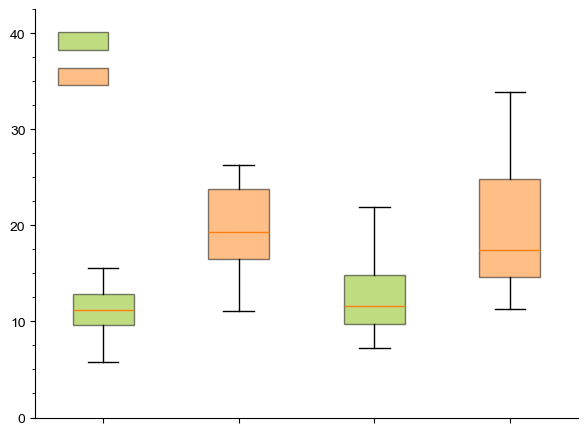

In [4]:
#new plot for the intensity upon aspiration in early and late embryos in the pipette
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')  
# Get the data subsets for lateindex and earlyindex
lateindex = np.invert(np.isin(np.arange(data.shape[1]), earlyindex))
late_data = data[1:, lateindex].T
early_data = data[1:, earlyindex].T

# Plot the boxplots
x_locations = np.arange(4)
bplot=plt.boxplot(early_data[:,:2], positions=x_locations[:2],patch_artist=True,widths=0.45)
bplot2=plt.boxplot(late_data[:,:2], positions=x_locations[2:],patch_artist=True,widths=0.45)

colors=["#83bb03","#ff7f0e","#83bb03","#ff7f0e"]

for bp in (bplot,bplot2):
    for bplo in bp:
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
# Set the x-axis tick labels
tick_labels = ['', '', '', '']
plt.xticks(x_locations, tick_labels)
plt.legend([bplot["boxes"][0],bplot["boxes"][1]],[" ","  "],loc="upper left",frameon=False,fontsize=18)
plt.yticks(np.arange(0,44,2.5),minor=True)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 296.33it/s]


Folder4
meanplo1 [16.344] meanplo2 [22.27]
24062025_Pos000 22.27 16.344
Folder4
meanplo1 [16.344, 16.764] meanplo2 [22.27, 17.098]
24062025_Pos004 17.098 16.764
Folder4
meanplo1 [16.344, 16.764, 10.108] meanplo2 [22.27, 17.098, 13.641]
24062025_Pos005 13.641 10.108
Folder4
meanplo1 [16.344, 16.764, 10.108, 13.06] meanplo2 [22.27, 17.098, 13.641, 17.868]
24062025_Pos006 17.868 13.06
Folder4
meanplo1 [16.344, 16.764, 10.108, 13.06, 14.428] meanplo2 [22.27, 17.098, 13.641, 17.868, 19.62]
24062025_Pos007 19.62 14.428
Folder4
meanplo1 [16.344, 16.764, 10.108, 13.06, 14.428, 15.865] meanplo2 [22.27, 17.098, 13.641, 17.868, 19.62, 21.132]
24062025_Pos010 21.132 15.865
Folder4
meanplo1 [16.344, 16.764, 10.108, 13.06, 14.428, 15.865, 12.562] meanplo2 [22.27, 17.098, 13.641, 17.868, 19.62, 21.132, 16.245]
24062025_Pos011 16.245 12.562
Folder4
meanplo1 [16.344, 16.764, 10.108, 13.06, 14.428, 15.865, 12.562, 15.9927] meanplo2 [22.27, 17.098, 13.641, 17.868, 19.62, 21.132, 16.245, 30.3798]
24062025

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 285.74it/s]

pipmax []
01072025_Pos001 7.462 5.856
pipmax [5.856]
01072025_Pos002 8.672 6.105
pipmax [5.856, 6.105]
01072025_Pos003 12.634 7.801
pipmax [5.856, 6.105, 7.801]
01072025_Pos004 11.667 8.089


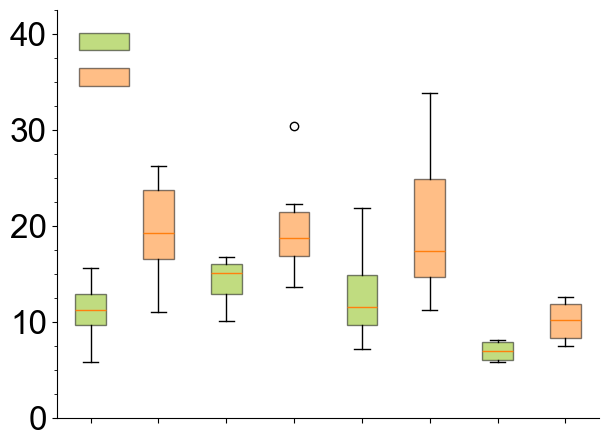

In [51]:
folder4="H:/PHD_data/Imaging_et_analysis/Stellaris/2025/06_June/24062025_CYtoD/"
folder5="H:/PHD_data/Imaging_et_analysis/Stellaris/2025/07_Juli/01072025_CytoD/"
meanplo1= []
meanplo2= []
meanplo3= []
meanplo4= []
for folder in [folder4,folder5]:
    cytodfiles1=glob(folder+"/*/*.CSV")

    for file in tqdm(cytodfiles1):
        pos = file[file.find("os")-1:file.find("os")+7]
        date=str(find(r'/(\d{8})_',file)[0])
        fid=date+"_"+pos[:-2]
        pipdf = pd.read_csv(file, delimiter="[;,,]", engine="python")
        pipmax = np.max(pipdf["Mean"])
        pipmin = pipdf["Mean"][0]
        if folder==folder4:
            print("Folder4")
            meanplo2.append(pipmax)
            
            meanplo1.append(pipmin)
            print("meanplo1",meanplo1,"meanplo2",meanplo2)
        elif date=="01072025":
            meanplo4.append(pipmax)
            print("pipmax",meanplo3)
            meanplo3.append(pipmin)
        print(fid,pipmax,pipmin)
# Plotting the mean pipette aspiration values
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# Create the boxplot data
box_data = [meanplo1, meanplo2, meanplo3, meanplo4]
xpositions = np.arange(8)
bplot=plt.boxplot(early_data[:,:2], positions=xpositions[:2],patch_artist=True,widths=0.45)
bplot2=plt.boxplot(late_data[:,:2], positions=xpositions[4:6],patch_artist=True,widths=0.45)

bplot3 = plt.boxplot(box_data[:2],positions=xpositions[2:4], patch_artist=True, widths=0.45) 
bplot4 = plt.boxplot(box_data[2:],positions=xpositions[6:], patch_artist=True, widths=0.45)   
colors1=["#83bb03","#ff7f0e"]
colors2=["#84bb0367","#ff7e0e60"]
for bp in (bplot,bplot2):
    for patch, color in zip(bp['boxes'], colors1):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
for bp2 in (bplot3,bplot4):
    for patch, color2 in zip(bp2['boxes'], colors2):
        patch.set_facecolor(color2)
        patch.set_alpha(0.5)
# Set the x-axis tick labels
tick_labels = ['', '', '', '']*2
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.legend([bplot["boxes"][0],bplot["boxes"][1]],[" ","  "],loc="upper left",frameon=False,fontsize=18)
plt.yticks(np.arange(0,44,2.5),minor=True)      
plt.show()

In [36]:
box_data

[[], [], [7.462, 8.672, 12.634, 11.667], [0.0, 2.527, 7.47, 7.119]]